**Customer Churn Prediction**
--
---

In [63]:
import pandas as pd
import numpy as np

*Data pre-processing:*

In [64]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [65]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [66]:
#Dropping unnecessary columns
df.drop(columns=['RowNumber','CustomerId','Surname','Geography'], inplace=True)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0


In [67]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

In [68]:
df.tail()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,42,3,75075.31,2,1,0,92888.52,1
9999,792,0,28,4,130142.79,1,1,0,38190.78,0


In [69]:
#Checking for duplicates
df.duplicated().sum()

0

*Exploratory data analysis:*

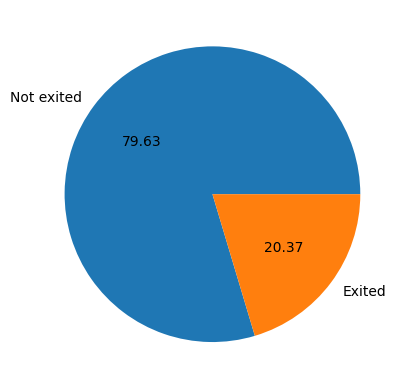

In [70]:
import matplotlib.pyplot as plt
plt.pie(df['Exited'].value_counts(), labels = ['Not exited','Exited'],autopct="%0.2f")
plt.show()

<Axes: >

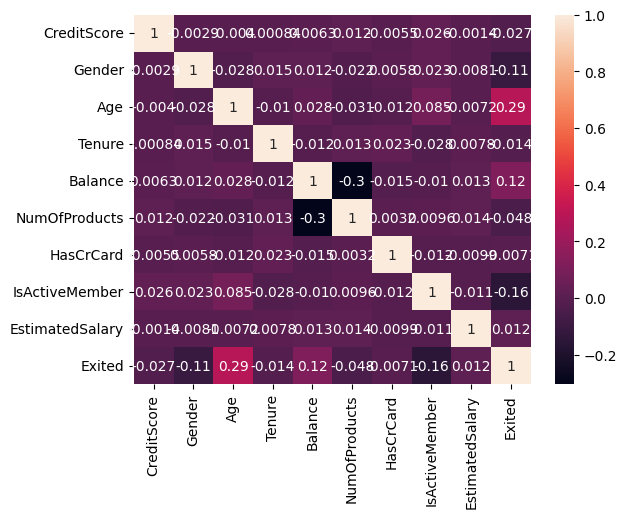

In [71]:
import seaborn as sns
#Heatmap
sns.heatmap(df.corr(), annot=True)

*Data preprocessing/data visualization:*

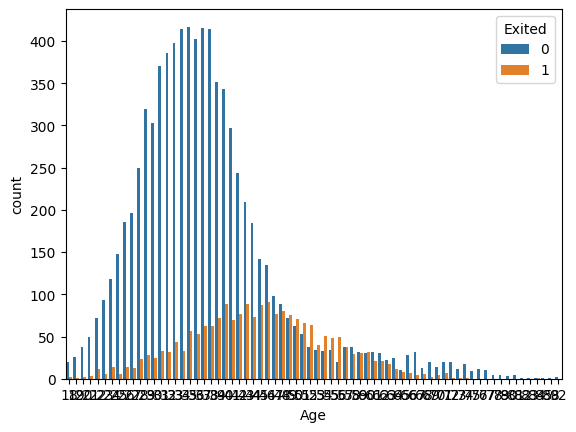

In [72]:
sns.countplot(x='Age',hue='Exited',data=df)
plt.show()

*Model building:*

In [73]:
X = df.drop('Exited',axis=1)

In [74]:
y = df['Exited']

In [75]:
#Splitting the data into test and train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [76]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [77]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(max_iter=300)

In [78]:
#Logistic regression
lg.fit(X_train,y_train)
y_pred_lg = lg.predict(X_test)
print(accuracy_score(y_test,y_pred_lg))
print(precision_score(y_test,y_pred_lg,average='weighted',labels=np.unique(y_pred_lg)))
print(lg.score(X_train,y_train))
print(lg.score(X_test,y_test))

0.7995
0.715921618852459
0.78775
0.7995


In [79]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=2)

In [80]:
#Random forest classifier algorithm
rfc.fit(X_train,y_train)
y_pred_r = rfc.predict(X_test)
print(accuracy_score(y_test,y_pred_r))
print(precision_score(y_test,y_pred_r,average='weighted',labels=np.unique(y_pred_r)))
print(rfc.score(X_train,y_train))
print(rfc.score(X_test,y_test))

0.855
0.842290033290305
1.0
0.855


In [81]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [82]:
#Gradient boosting classifier
gb.fit(X_train,y_train)
y_pred_gb = gb.predict(X_test)
print(accuracy_score(y_test,y_pred_gb))
print(precision_score(y_test,y_pred_gb,average='weighted',labels=np.unique(y_pred_gb)))
print(gb.score(X_train,y_train))
print(gb.score(X_test,y_test))

0.859
0.8489593133807403
0.86925
0.859


In [83]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

In [84]:
#K Neighbours classifier algorithm
knc.fit(X_train,y_train)
y_pred_k = knc.predict(X_test)
print(accuracy_score(y_test,y_pred_k))
print(precision_score(y_test,y_pred_k,average='weighted'))
print(knc.score(X_train,y_train))
print(knc.score(X_test,y_test))

0.7735
0.6956189833970565
0.812625
0.7735


**Conclusion:**
--
By observing the results, we can conclude that the Random forest classifier algorithm is more suitable algorithm for customer churn prediction than other algorithms.